# Lab 0

**Random Split**

Step 1 - Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [ ]:
df.shape

(891, 5)

Step 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split again between validation and testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Check the respective dataset sizes

print(f'Original data count: {df.shape[0]}')
print(f'Training data count: {df_train.shape[0]}')
print(f'Validation data count: {df_val.shape[0]}')
print(f'Test data count: {df_test.shape[0]}')

# Check the ratio of each label
print('=========')
print(f'Original label counts:\n{df.Survived.value_counts()}')
print(f'Training label counts:\n{df_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df_val.Survived.value_counts()}')
print(f'Test label counts:\n{df_test.Survived.value_counts()}')

Original data count: 891
Training data count: 712
Validation data count: 89
Test data count: 90
Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    53
1    36
Name: count, dtype: int64
Test label counts:
Survived
0    57
1    33
Name: count, dtype: int64


**Stratified Split**

Step 1 - Load Data

In [ ]:
import pandas as pd

df2 = pd.read_csv('Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split again between validation and testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Check the respective dataset sizes

print(f'Original label counts:\n{df2.Survived.value_counts()}')
print(f'Training label counts:\n{df2_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df2_val.Survived.value_counts()}')
print(f'Test label counts:\n{df2_test.Survived.value_counts()}')

Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    51
1    38
Name: count, dtype: int64
Test label counts:
Survived
0    59
1    31
Name: count, dtype: int64


**Cross Validation 1**

In this practical exercise, we will create only training and test datasets using the cross-validation method.

Step 1 - Load Data

In [ ]:
import pandas as pd

df3 = pd.read_csv('Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data

In [ ]:
# Implementation of k-fold cross-validation (random) with training and testing only
from sklearn.model_selection import KFold

# initialize the kfold object
kf = KFold(n_splits=4)
print(f'Number of folds: {kf.get_n_splits()}')
print(f'KFold object: {kf}')

# Perform splitting with KFold
kf_split = kf.split(df3)
print(f'Number of rows in df: {df.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df: 891
Train index: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438


**Cross Validation 2**

In this laboratory exercise, we adopt an approach that differs slightly from the previous practical session. First, the data will be split into training and test sets. Then, the training data will be partitioned into several segments using cross-validation for the purposes of training and validation.

Step 1 - Load Data

In [ ]:
import pandas as pd

df4 = pd.read_csv('Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data

In [ ]:
# Implementation of k-fold cross-validation (random) with training, validation, and testing data
from sklearn.model_selection import train_test_split, KFold

# First split between training and testing data using train_test_split
# 8:2 ratio for training and testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# initialize the kfold object
kf2 = KFold(n_splits=4)
print(f'Number of folds: {kf2.get_n_splits()}')
print(f'KFold object: {kf2}')

# Perform splitting with KFold for the training dataframe
# With this procedure, we still retain testing data for model evaluation
# while nevertheless being able to perform evaluation using validation data
kf2_split = kf2.split(df_train)
print(f'Number of rows in df_train: {df4_train.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf2_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df_train: 712
Train index: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 39

#Lab 1

Step 1: Data Preparation

Download and place the data file to be used in the same directory. Ensure the data is saved in CSV format.

Step 2: Import Libraries

In [ ]:
# import package
import numpy as np
import pandas as pd

Step 3: Read the Data

In [ ]:
# read data from CSV file
data = pd.read_csv('dataset.csv')

Step 4: Understanding the Data

In [ ]:
# view some initial data
data.head()

# check data dimensions
data.shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Step 5: Data Visualization

In [ ]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


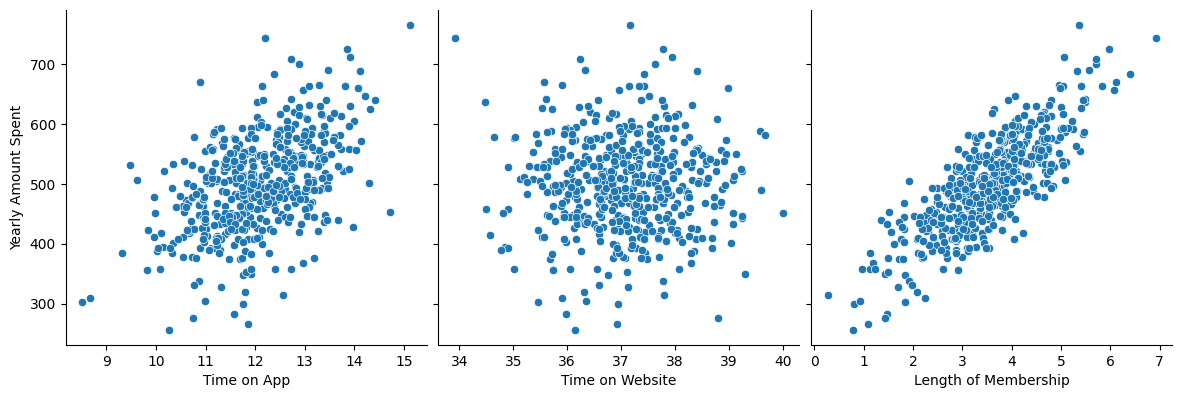

In [ ]:
# visualize data with pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

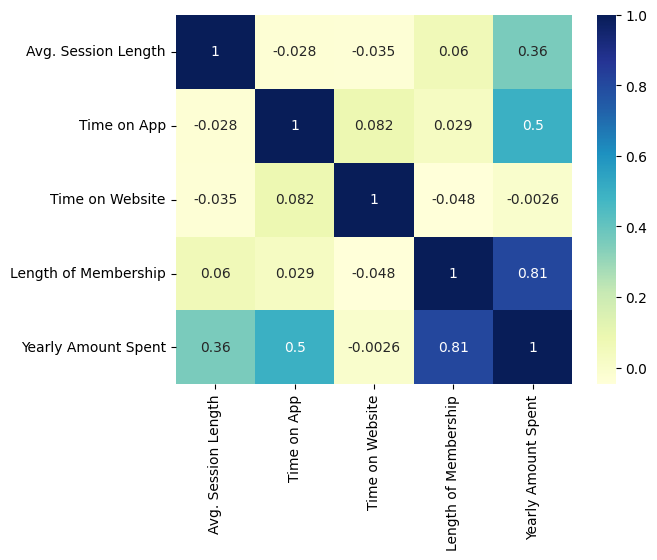

In [ ]:
# visualize correlation with heatmap
# Drop non-numeric columns before calculating correlation
numeric_data = data.drop(['Email', 'Address', 'Avatar'], axis=1)
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Step 6: Linear Regression

In [ ]:
# Create independent variable X and Y, example selection from prior correlation analysis
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [ ]:
# Split training and test data with a 7:3 proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Train the linear regression model using the StatsModels library. Add a constant (intercept) to the independent variable.

In [ ]:
# Model training
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

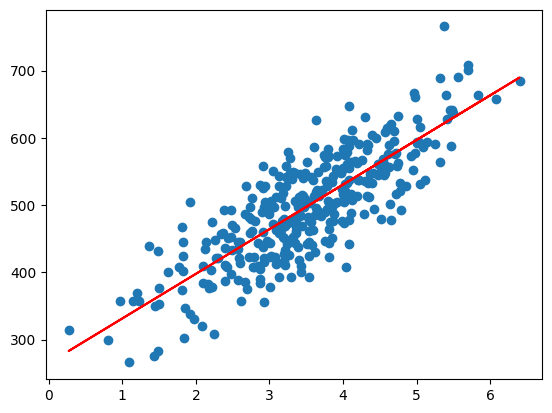

In [ ]:
# Visualization of regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Step 7: Residual Analysis

In [ ]:
# Predict y_value from the trained x data
y_train_pred = lr.predict(X_train_sm)

# Calculating residuals
res = (y_train - y_train_pred)

/tmp/ipython-input-4216909171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


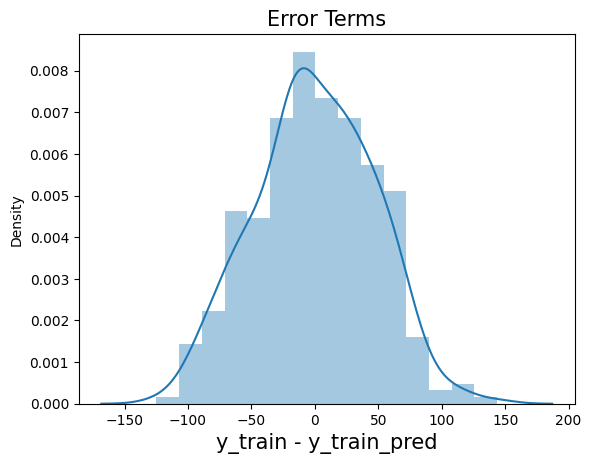

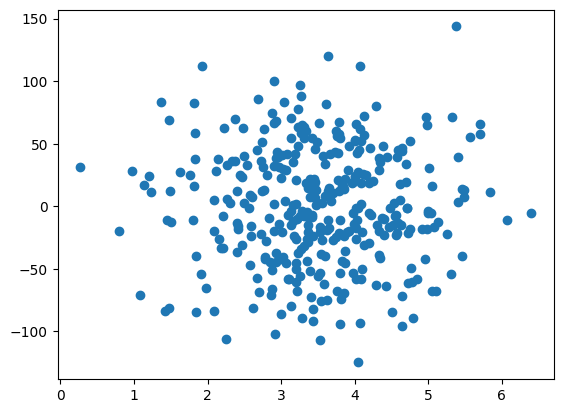

In [ ]:
# Residual histogram
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Residual scatter plot
plt.scatter(X_train, res)
plt.show()

Step 8: Prediction on Test Data and Model Evaluation

In [ ]:
# Prediction on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [ ]:
# Compute R-squared value
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Step 9: Visualization of Results

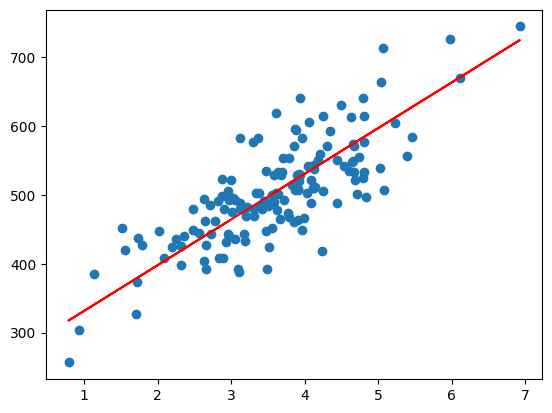

In [ ]:
# Visualize test data and prediction results
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

#Lab 2

Step 1 - Import Libraries

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 2 - Load the Dataset

In [ ]:
# Importing the dataset (Ensure you have the CSV file 'Posisi_gaji.csv' in the same directory)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Change to a single column only

Step 3 - Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

Step 4 - Fitting the SVR Model

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Step 5 - Visualizing SVR Results

/tmp/ipython-input-3243201412.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


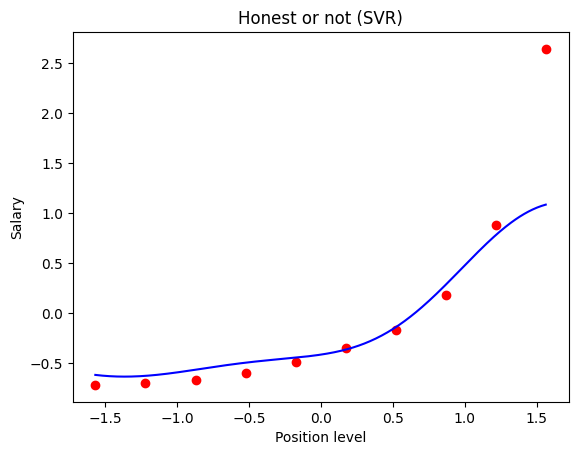

In [ ]:
# Visualizing SVR results (higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Honest or not (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Step 6 - Predicting Results

In [ ]:
# Predicting the result
# Create a 2D array containing the position level to be predicted
position_level_to_predict = np.array([[6.5]])
# Feature scaling for the data to be predicted
position_level_to_predict = sc_X.transform(position_level_to_predict)
# Perform prediction using the SVR model
predicted_salary = regressor.predict(position_level_to_predict)
# Return the predicted result to the original scale
predicted_salary = sc_y.inverse_transform(predicted_salary.reshape(-1, 1))

Step 7 - Displaying Results

In [ ]:
# Displaying the predicted result
print("Predicted Salary for Position Level 6.5:", predicted_salary[0])

Predicted Salary for Position Level 6.5: [170370.0204065]


Step 8 - Evaluating the SVR Model

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Calculating MAE
mae = mean_absolute_error(y_actual, y_pred)

# Calculating MSE
mse = mean_squared_error(y_actual, y_pred)

# Calculating RMSE
rmse = np.sqrt(mse)

# Calculating R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


#Assignment

In [ ]:
import pandas as pd

# Load the dataset
df= pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


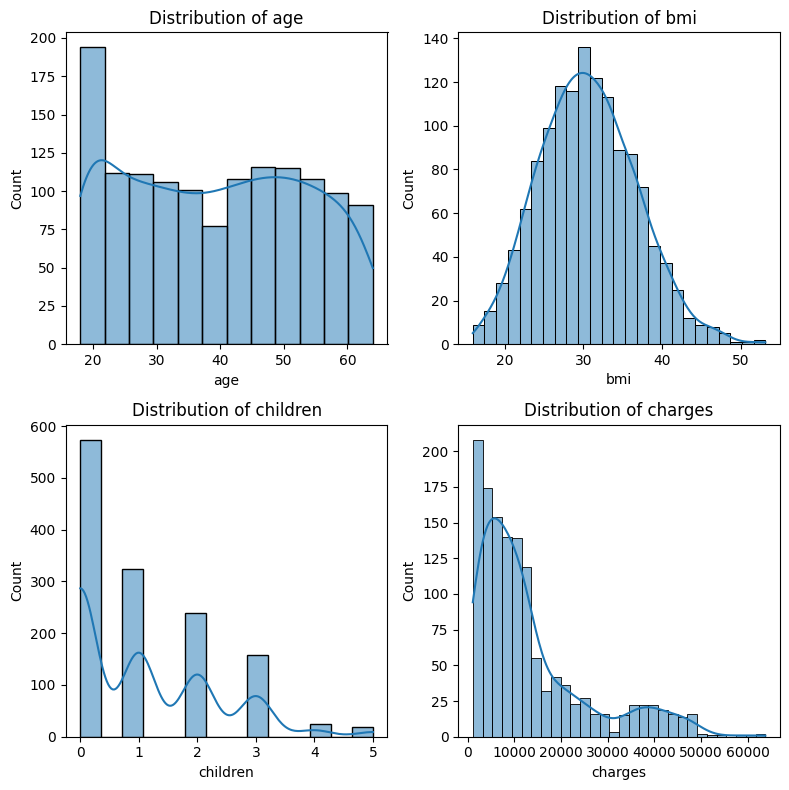

In [ ]:
# visualize numerical data distribution
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'bmi', 'children', 'charges']
fig = plt.figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

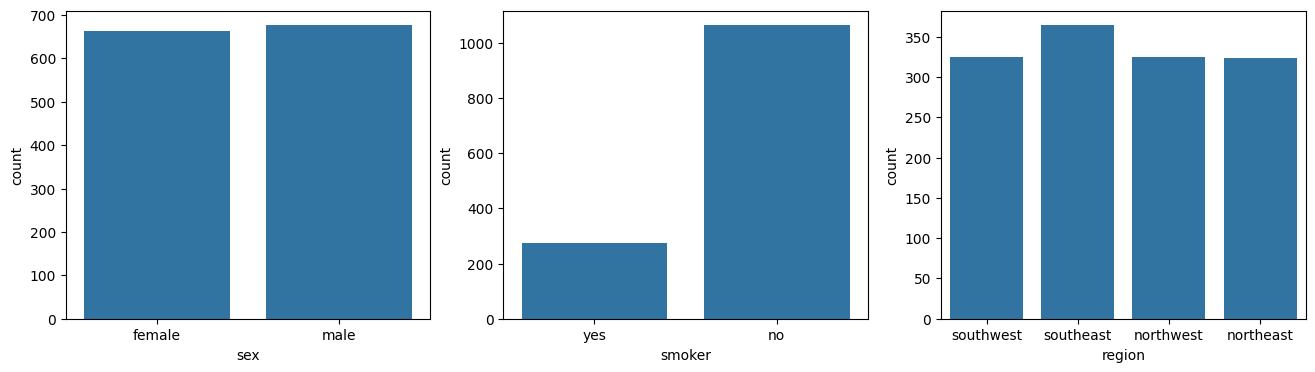

In [ ]:
# visualize categorical data distribution
cat_cols = ['sex', 'smoker', 'region']
fig = plt.figure
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])

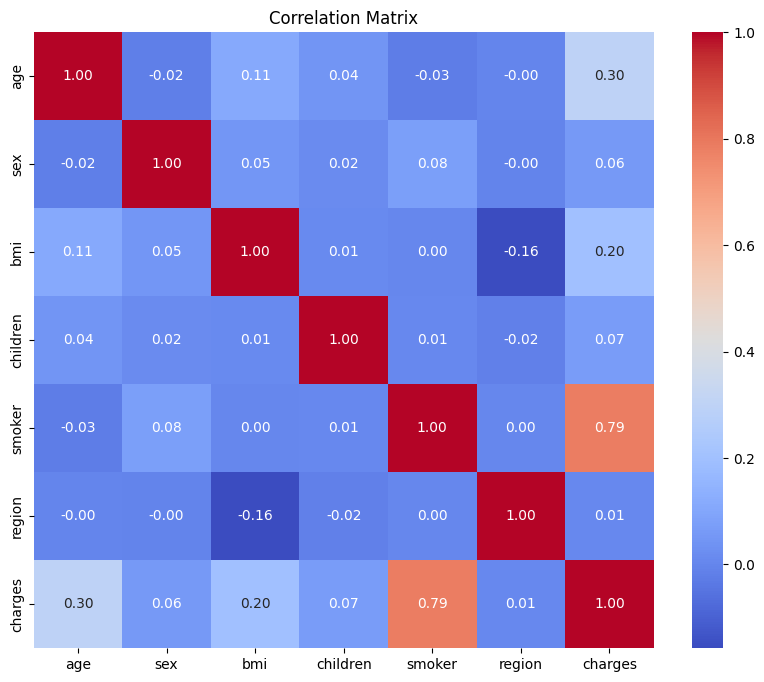

Correlation with Charges
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64


In [ ]:
# correlation analysis
df_num = df.copy()

# encode categorical variable
df_num['sex'] = df_num['sex'].map({'female': 0, 'male': 1})
df_num['smoker'] = df_num['smoker'].map({'no': 0, 'yes': 1})
df_num['region'] = df_num['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# correlation matrix
corr_matrix = df_num.corr()

# visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# correlation with target variable
print("Correlation with Charges")
corr_with_target = corr_matrix['charges'].sort_values(ascending=False)
print(corr_with_target)

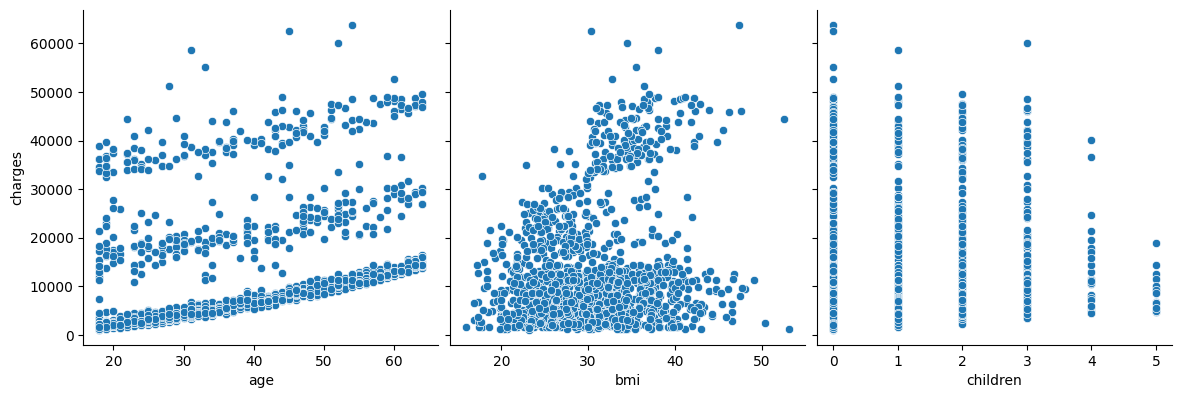

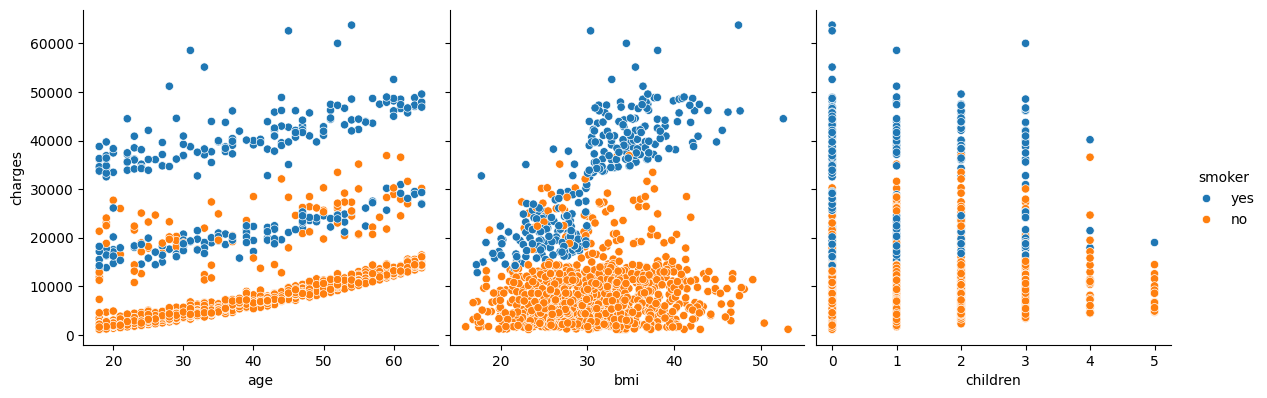

In [ ]:
# visualize data with pairplot
sns.pairplot(df, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

# visualize data based smoker status
sns.pairplot(df, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', height=4, aspect=1, kind='scatter', hue='smoker')
plt.show()

## Identify the variables to be used as independent variables (features) and the target variable (personal medical cost).

In [ ]:
df_processed = df.copy()

# encode categorical variable
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})

# one-hot encode region variable
df_processed = pd.get_dummies(df_processed, columns=['region'], prefix=['region'], drop_first=True)

print(df_processed.head())
print("New shape: ", df_processed.shape)

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
New shape:  (1338, 9)


In [ ]:
# define independent variables
X = df_processed.drop('charges', axis=1)

# define target variable
y = df_processed['charges']

Train-Test Split Results:
Training set size: 1070 samples (80.0%)
Testing set size: 268 samples (20.0%)

Training features shape: (1070, 8)
Training target shape: (1070,)
Testing features shape: (268, 8)
Testing target shape: (268,)

Training set statistics:
count     1070.000000
mean     13346.089736
std      12019.510778
min       1121.873900
25%       4897.667387
50%       9575.442100
75%      16746.657400
max      62592.873090
Name: charges, dtype: float64

Testing set statistics:
count      268.000000
mean     12968.317063
std      12483.196202
min       1131.506600
25%       4288.744850
50%       8487.880300
75%      16367.829375
max      63770.428010
Name: charges, dtype: float64


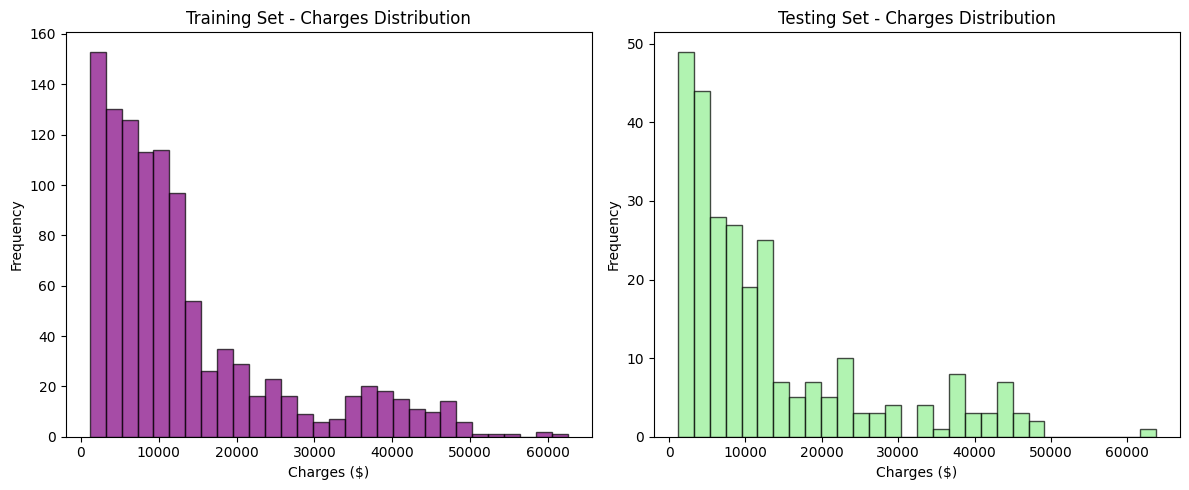

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

# 80% training, 20% tetsing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 50)
print("Train-Test Split Results:")
print("=" * 50)
print(
    f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0] / len(X) * 100:.1f}%)"
)
print(
    f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0] / len(X) * 100:.1f}%)"
)
print(f"\nTraining features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Testing target shape: {y_test.shape}")

print("\n" + "=" * 50)
print("Training set statistics:")
print("=" * 50)
print(y_train.describe())

print("\n" + "=" * 50)
print("Testing set statistics:")
print("=" * 50)
print(y_test.describe())

# Visualize the split
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(y_train, bins=30, color="purple", edgecolor="black", alpha=0.7)
axes[0].set_title("Training Set - Charges Distribution")
axes[0].set_xlabel("Charges ($)")
axes[0].set_ylabel("Frequency")

axes[1].hist(y_test, bins=30, color="lightgreen", edgecolor="black", alpha=0.7)
axes[1].set_title("Testing Set - Charges Distribution")
axes[1].set_xlabel("Charges ($)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##Feature Scaling

Feature Scaling Results:
Scaled training features shape: (1070, 8)
Scaled testing features shape: (268, 8)

Before Scaling (Training Set - First 5 rows):
      age  sex    bmi  children  smoker  region_northwest  region_southeast  \
560    46    0  19.95         2       0              True             False   
1285   47    0  24.32         0       0             False             False   
1142   52    0  24.86         0       0             False              True   
969    39    0  34.32         5       0             False              True   
486    54    0  21.47         3       0              True             False   

      region_southwest  
560              False  
1285             False  
1142             False  
969              False  
486              False  

After Scaling (Training Set - First 5 rows):
        age       sex       bmi  children    smoker  region_northwest  \
0  0.472227 -1.024602 -1.756525  0.734336 -0.508747          1.783168   
1  0.543313 -1.024602 -1.0330

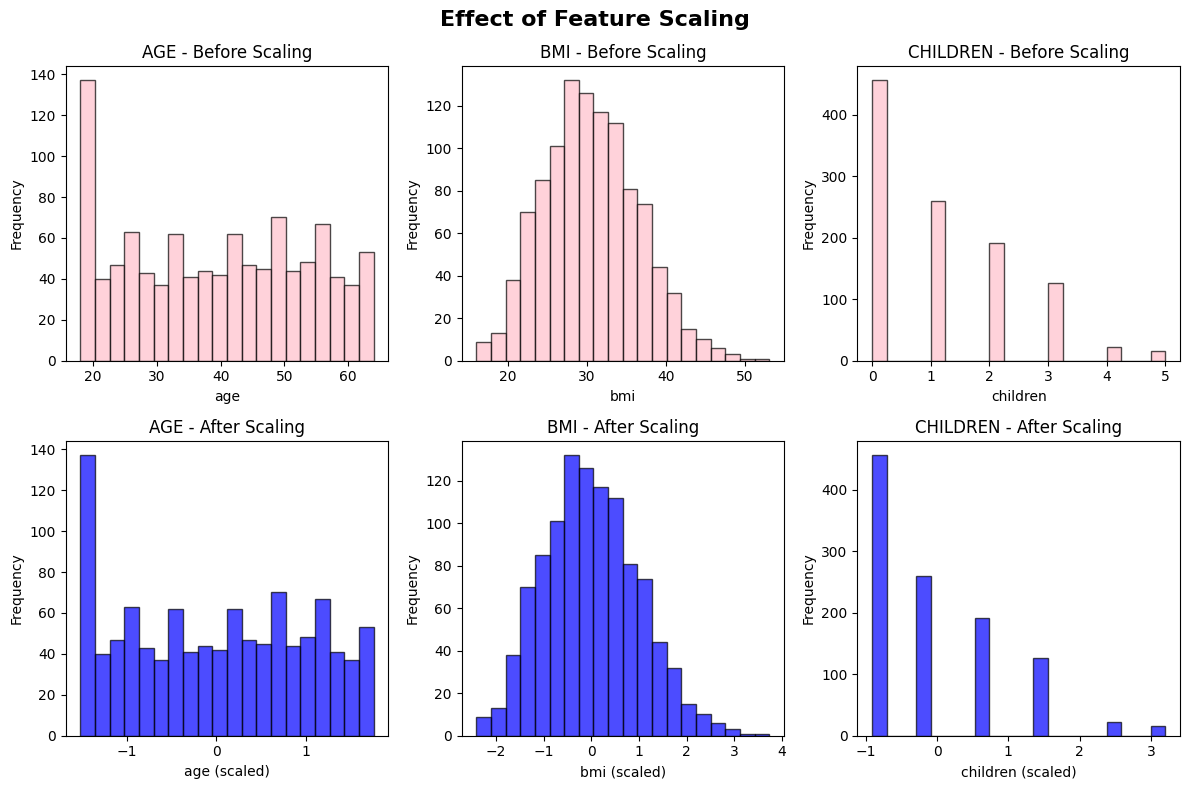

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("=" * 50)
print("Feature Scaling Results:")
print("=" * 50)
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

print("\n" + "=" * 50)
print("Before Scaling (Training Set - First 5 rows):")
print("=" * 50)
print(X_train.head())

print("\n" + "=" * 50)
print("After Scaling (Training Set - First 5 rows):")
print("=" * 50)
print(X_train_scaled_df.head())

print("\n" + "=" * 50)
print("Training Set - Feature Statistics After Scaling:")
print("=" * 50)
print(X_train_scaled_df.describe())

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Effect of Feature Scaling", fontsize=16, fontweight="bold")

features_to_plot = ["age", "bmi", "children"]
for idx, feature in enumerate(features_to_plot):
    # Before scaling
    axes[0, idx].hist(
        X_train[feature], bins=20, color="pink", edgecolor="black", alpha=0.7
    )
    axes[0, idx].set_title(f"{feature.upper()} - Before Scaling")
    axes[0, idx].set_xlabel(feature)
    axes[0, idx].set_ylabel("Frequency")

    # After scaling
    axes[1, idx].hist(
        X_train_scaled_df[feature],
        bins=20,
        color="blue",
        edgecolor="black",
        alpha=0.7,
    )
    axes[1, idx].set_title(f"{feature.upper()} - After Scaling")
    axes[1, idx].set_xlabel(f"{feature} (scaled)")
    axes[1, idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##Multiple Linear Regression

Train Multiple Linear Model

Multiple Linear Regression Model Training Complete

Model Intercept: $13,346.09

Model Coefficients (Feature Importance):
         Feature  Coefficient
          smoker  9558.481409
             age  3614.975415
             bmi  2036.228123
        children   516.890247
             sex    -9.293101
region_northwest  -158.140981
region_southeast  -290.157047
region_southwest  -349.110678


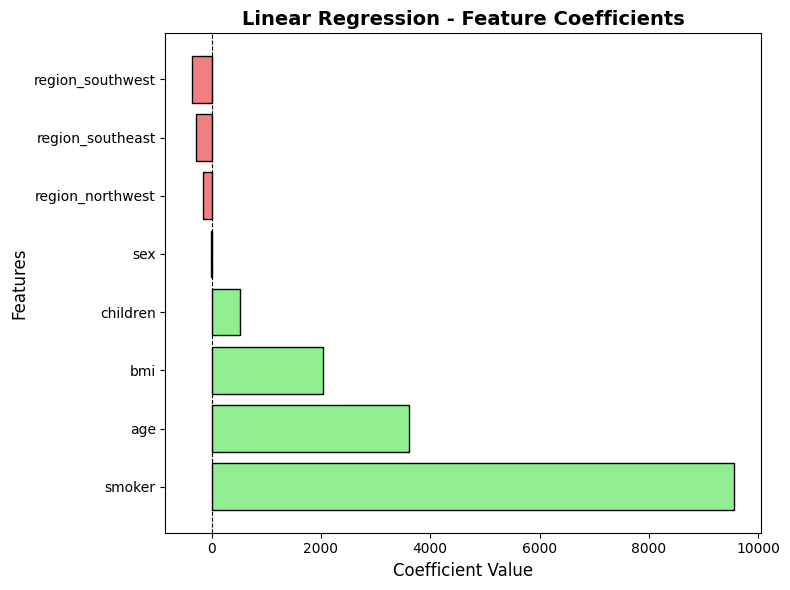

In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

print("=" * 50)
print("Multiple Linear Regression Model Training Complete")
print("=" * 50)
print(f"\nModel Intercept: ${lr_model.intercept_:,.2f}")
print("\n" + "=" * 50)
print("Model Coefficients (Feature Importance):")
print("=" * 50)

coefficients_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_,
}).sort_values("Coefficient", ascending=False)

print(coefficients_df.to_string(index=False))

# Visualization
plt.figure(figsize=(8, 6))
colors = ["lightgreen" if c > 0 else "lightcoral" for c in coefficients_df["Coefficient"]]
plt.barh(
    coefficients_df["Feature"],
    coefficients_df["Coefficient"],
    color=colors,
    edgecolor="black",
)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Linear Regression - Feature Coefficients", fontsize=14, fontweight="bold")
plt.axvline(x=0, color="black", linestyle="--", linewidth=0.8)
plt.tight_layout()
plt.show()

Make predictions on both training and testing sets

Linear Regression - Predictions Summary:
Number of training predictions: 1070
Number of testing predictions: 268

Sample Predictions vs Actual Values (Test Set):
     Actual    Predicted   Difference     Error %
 9095.06825  8969.550274   125.517976    1.380066
 5272.17580  7068.747443 -1796.571643  -34.076475
29330.98315 36858.410912 -7527.427762  -25.663742
 9301.89355  9454.678501  -152.784951   -1.642515
33750.29180 26973.173457  6777.118343   20.080177
 4536.25900 10864.113164 -6327.854164 -139.494993
 2117.33885   170.280841  1947.058009   91.957790
14210.53595 16903.450287 -2692.914337  -18.950125
 3732.62510  1092.430936  2640.194164   70.732905
10264.44210 11218.343184  -953.901084   -9.293258


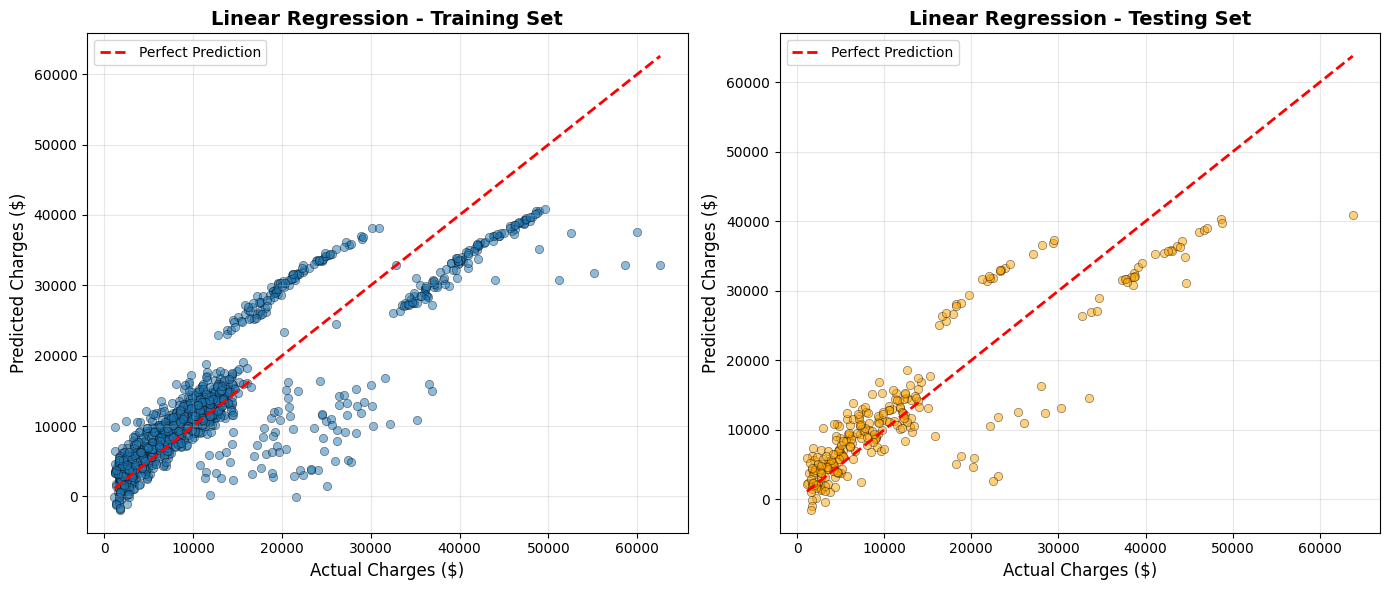

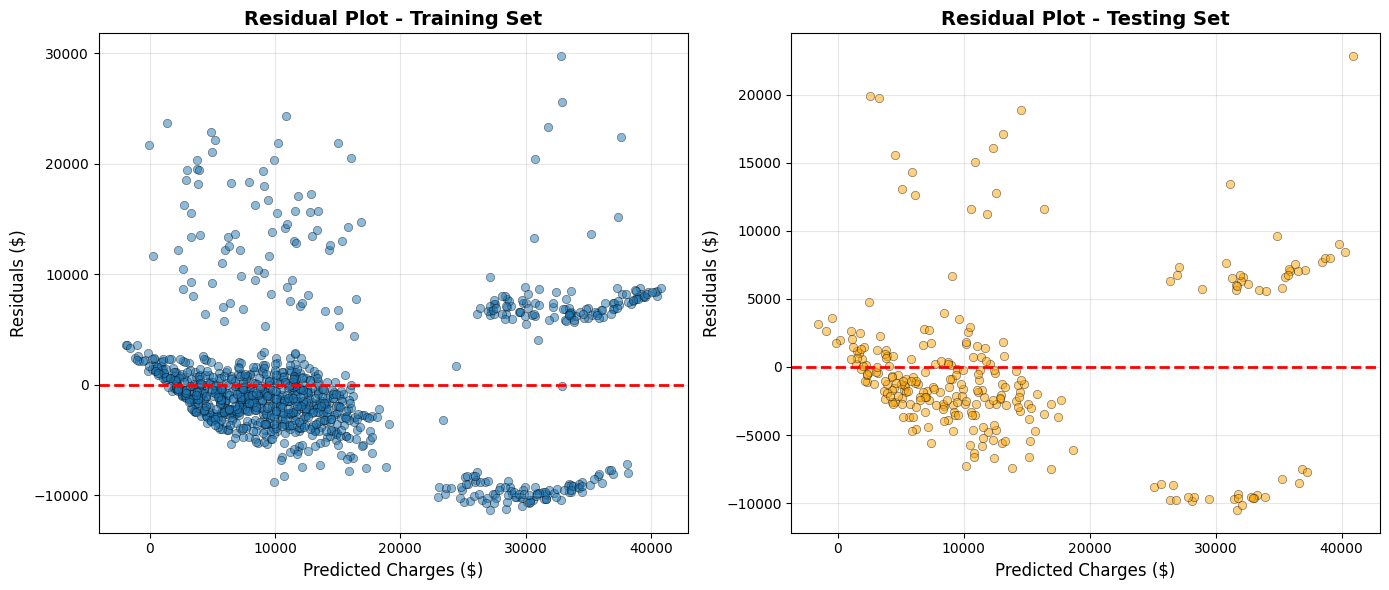

In [ ]:
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

print("="*50)
print("Linear Regression - Predictions Summary:")
print("="*50)
print(f"Number of training predictions: {len(y_train_pred_lr)}")
print(f"Number of testing predictions: {len(y_test_pred_lr)}")

print("\n" + "="*50)
print("Sample Predictions vs Actual Values (Test Set):")
print("="*50)

comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_test_pred_lr[:10],
    'Difference': y_test.values[:10] - y_test_pred_lr[:10],
    'Error %': ((y_test.values[:10] - y_test_pred_lr[:10]) / y_test.values[:10] * 100)
})
print(comparison_df.to_string(index=False))

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train, y_train_pred_lr, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Charges ($)', fontsize=12)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[0].set_title('Linear Regression - Training Set', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred_lr, alpha=0.5, color='orange', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Charges ($)', fontsize=12)
axes[1].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[1].set_title('Linear Regression - Testing Set', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plot (errors)
residuals_train = y_train - y_train_pred_lr
residuals_test = y_test - y_test_pred_lr

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training residuals
axes[0].scatter(y_train_pred_lr, residuals_train, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Charges ($)', fontsize=12)
axes[0].set_ylabel('Residuals ($)', fontsize=12)
axes[0].set_title('Residual Plot - Training Set', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Testing residuals
axes[1].scatter(y_test_pred_lr, residuals_test, alpha=0.5, color='orange', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Charges ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Residual Plot - Testing Set', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Evaluate Linear Regression Model

LINEAR REGRESSION MODEL - EVALUATION METRICS

TRAINING SET PERFORMANCE:
R² Score (R-squared):           0.7417 (74.17%)
Mean Squared Error (MSE):       $37,277,681.70
Root Mean Squared Error (RMSE): $6,105.55
Mean Absolute Error (MAE):      $4,208.23

TESTING SET PERFORMANCE:
R² Score (R-squared):           0.7836 (78.36%)
Mean Squared Error (MSE):       $33,596,915.85
Root Mean Squared Error (RMSE): $5,796.28
Mean Absolute Error (MAE):      $4,181.19

PERFORMANCE COMPARISON:
R² Difference (Train - Test):   -0.0419
RMSE Difference (Train - Test): $309.26
MAE Difference (Train - Test):  $27.04


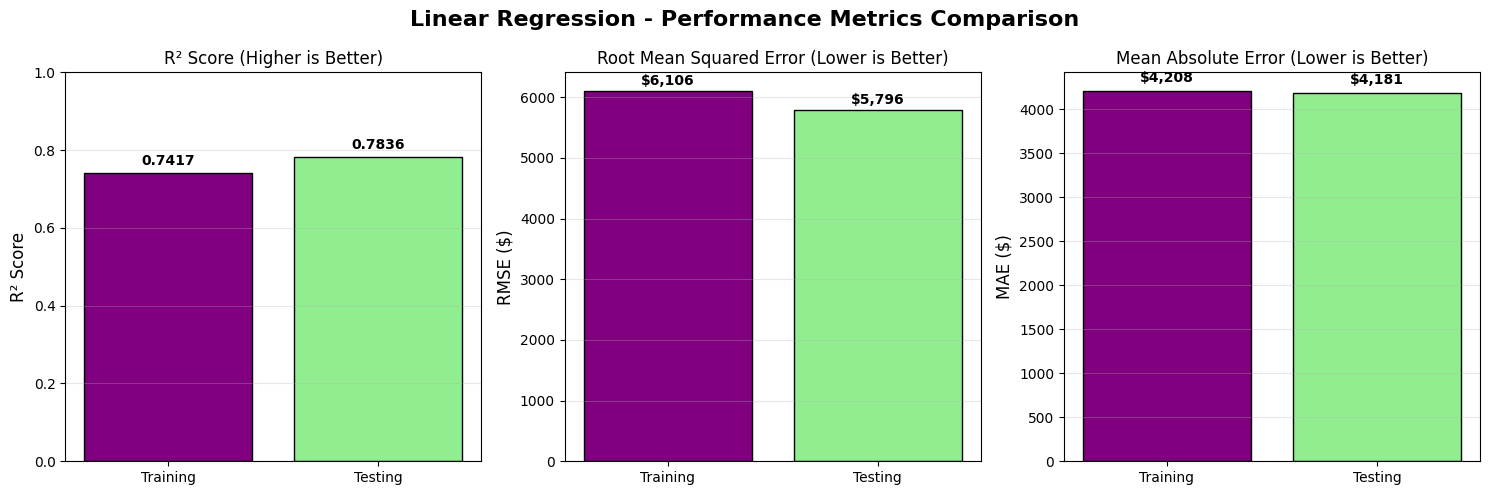

In [ ]:
# Training set metrics
r2_train_lr = r2_score(y_train, y_train_pred_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)

# Testing set metrics
r2_test_lr = r2_score(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Display results
print("=" * 70)
print("LINEAR REGRESSION MODEL - EVALUATION METRICS")
print("=" * 70)

print("\n" + "=" * 70)
print("TRAINING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_train_lr:.4f} ({r2_train_lr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_train_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_lr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_train_lr:,.2f}")

print("\n" + "=" * 70)
print("TESTING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_test_lr:.4f} ({r2_test_lr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_test_lr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_lr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_test_lr:,.2f}")

print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON:")
print("=" * 70)
print(f"R² Difference (Train - Test):   {r2_train_lr - r2_test_lr:.4f}")
print(f"RMSE Difference (Train - Test): ${rmse_train_lr - rmse_test_lr:,.2f}")
print(f"MAE Difference (Train - Test):  ${mae_train_lr - mae_test_lr:,.2f}")

# Visualize metrics comparison
metrics_comparison = {
    "Metric": ["R² Score", "RMSE ($)", "MAE ($)"],
    "Training": [r2_train_lr, rmse_train_lr, mae_train_lr],
    "Testing": [r2_test_lr, rmse_test_lr, mae_test_lr],
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(
    "Linear Regression - Performance Metrics Comparison", fontsize=16, fontweight="bold"
)

# R² Score
axes[0].bar(
    ["Training", "Testing"],
    [r2_train_lr, r2_test_lr],
    color=["purple", "lightgreen"],
    edgecolor="black",
)
axes[0].set_ylabel("R² Score", fontsize=12)
axes[0].set_title("R² Score (Higher is Better)", fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].grid(axis="y", alpha=0.3)
for i, v in enumerate([r2_train_lr, r2_test_lr]):
    axes[0].text(i, v + 0.02, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

# RMSE
axes[1].bar(
    ["Training", "Testing"],
    [rmse_train_lr, rmse_test_lr],
    color=["purple", "lightgreen"],
    edgecolor="black",
)
axes[1].set_ylabel("RMSE ($)", fontsize=12)
axes[1].set_title("Root Mean Squared Error (Lower is Better)", fontsize=12)
axes[1].grid(axis="y", alpha=0.3)
for i, v in enumerate([rmse_train_lr, rmse_test_lr]):
    axes[1].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# MAE
axes[2].bar(
    ["Training", "Testing"],
    [mae_train_lr, mae_test_lr],
    color=["purple", "lightgreen"],
    edgecolor="black",
)
axes[2].set_ylabel("MAE ($)", fontsize=12)
axes[2].set_title("Mean Absolute Error (Lower is Better)", fontsize=12)
axes[2].grid(axis="y", alpha=0.3)
for i, v in enumerate([mae_train_lr, mae_test_lr]):
    axes[2].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel="rbf", C=1.0, gamma="scale", epsilon=0.1)

print("=" * 50)
print("Training SVR Model...")
print("=" * 50)
print("SVR Parameters:")
print(f"  - Kernel: {svr_model.kernel}")
print(f"  - C (Regularization): {svr_model.C}")
print(f"  - Gamma: {svr_model.gamma}")
print(f"  - Epsilon: {svr_model.epsilon}")
print("\nTraining in progress... (this may take a moment)")

# Train the SVR model
svr_model.fit(X_train_scaled, y_train)

print("\n✓ SVR Model training complete!")

print("\n" + "=" * 50)
print("SVR Model Information:")
print("=" * 50)
print(f"Number of support vectors: {len(svr_model.support_)}")
print(f"Support vector indices shape: {svr_model.support_.shape}")

Training SVR Model...
SVR Parameters:
  - Kernel: rbf
  - C (Regularization): 1.0
  - Gamma: scale
  - Epsilon: 0.1

Training in progress... (this may take a moment)

✓ SVR Model training complete!

SVR Model Information:
Number of support vectors: 1070
Support vector indices shape: (1070,)


Make predictions on both training and testing sets

SVR - Predictions Summary:
Number of training predictions: 1070
Number of testing predictions: 268

Sample Predictions vs Actual Values (Test Set):
     Actual   Predicted   Difference     Error %
 9095.06825 9557.280739  -462.212489   -5.082012
 5272.17580 9542.939133 -4270.763333  -81.005708
29330.98315 9626.033174 19704.949976   67.181348
 9301.89355 9566.917756  -265.024206   -2.849143
33750.29180 9595.518594 24154.773206   71.569080
 4536.25900 9561.224579 -5024.965579 -110.773339
 2117.33885 9528.466017 -7411.127167 -350.020837
14210.53595 9607.858301  4602.677649   32.389191
 3732.62510 9534.450612 -5801.825512 -155.435527
10264.44210 9574.615185   689.826915    6.720550


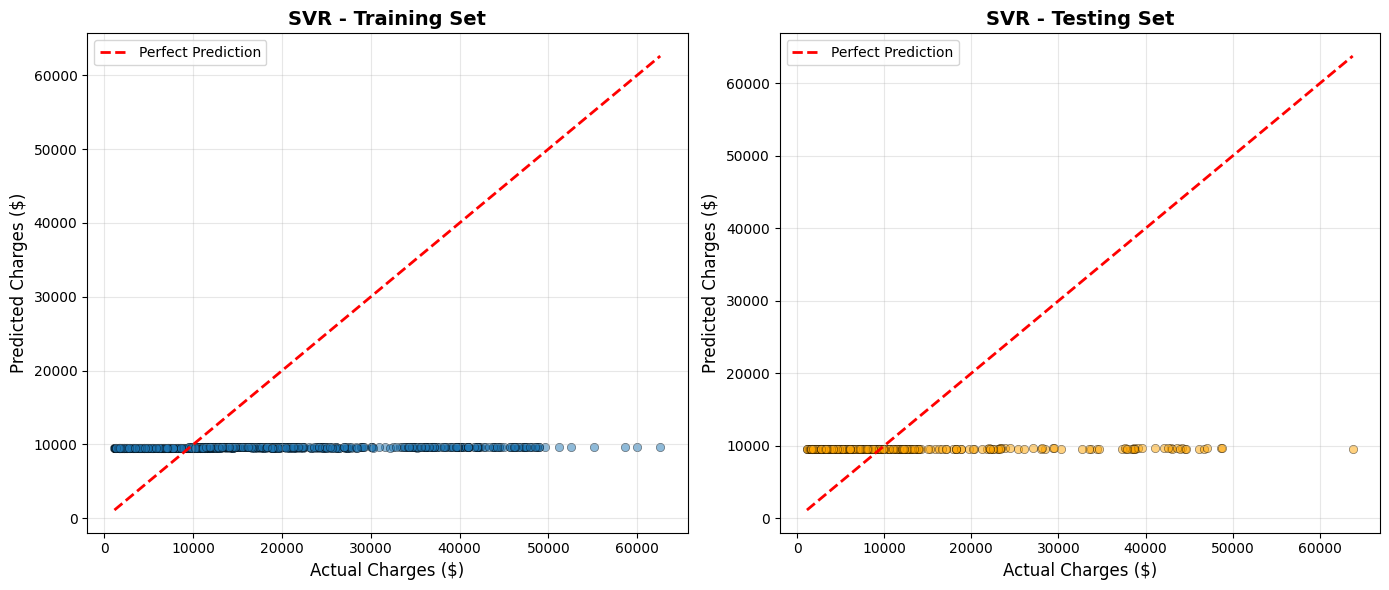

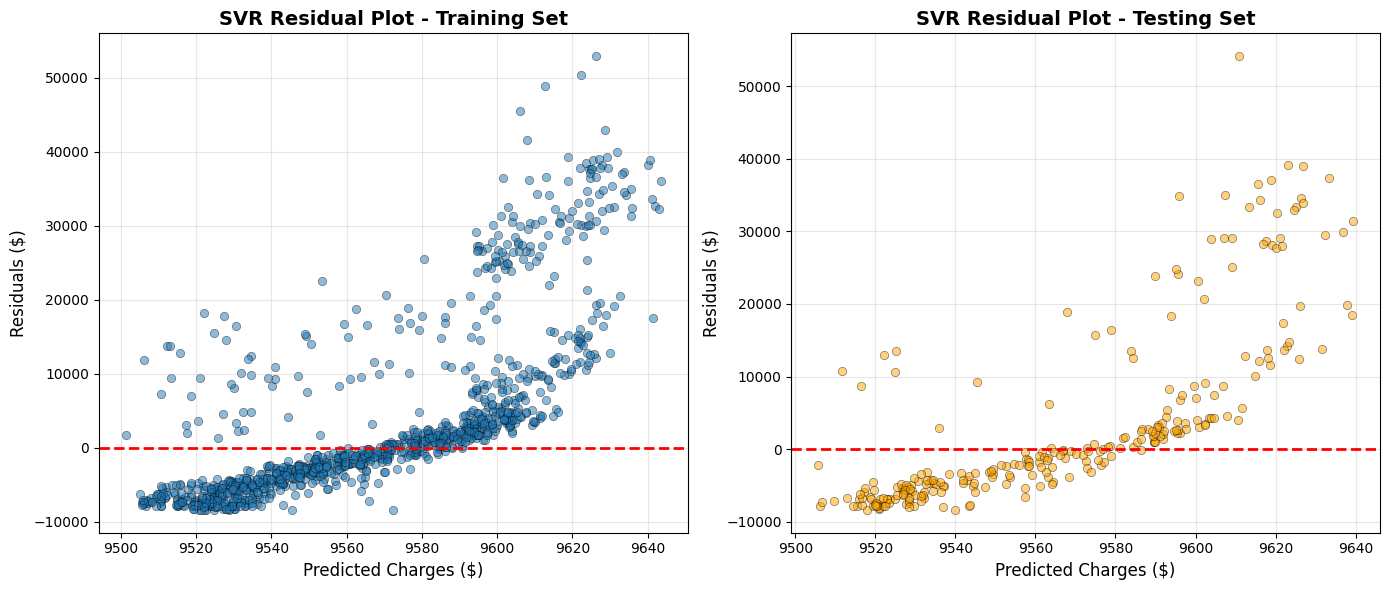

In [ ]:
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

print("="*50)
print("SVR - Predictions Summary:")
print("="*50)
print(f"Number of training predictions: {len(y_train_pred_svr)}")
print(f"Number of testing predictions: {len(y_test_pred_svr)}")

print("\n" + "="*50)
print("Sample Predictions vs Actual Values (Test Set):")
print("="*50)

comparison_df_svr = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_test_pred_svr[:10],
    'Difference': y_test.values[:10] - y_test_pred_svr[:10],
    'Error %': ((y_test.values[:10] - y_test_pred_svr[:10]) / y_test.values[:10] * 100)
})
print(comparison_df_svr.to_string(index=False))

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train, y_train_pred_svr, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Charges ($)', fontsize=12)
axes[0].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[0].set_title('SVR - Training Set', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred_svr, alpha=0.5, color='orange', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Charges ($)', fontsize=12)
axes[1].set_ylabel('Predicted Charges ($)', fontsize=12)
axes[1].set_title('SVR - Testing Set', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plot (errors)
residuals_train_svr = y_train - y_train_pred_svr
residuals_test_svr = y_test - y_test_pred_svr

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training residuals
axes[0].scatter(y_train_pred_svr, residuals_train_svr, alpha=0.5, edgecolors='black', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Charges ($)', fontsize=12)
axes[0].set_ylabel('Residuals ($)', fontsize=12)
axes[0].set_title('SVR Residual Plot - Training Set', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Testing residuals
axes[1].scatter(y_test_pred_svr, residuals_test_svr, alpha=0.5, color='orange', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Charges ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('SVR Residual Plot - Testing Set', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Evaluate SVR model

SUPPORT VECTOR REGRESSION (SVR) MODEL - EVALUATION METRICS

TRAINING SET PERFORMANCE:
R² Score (R-squared):           -0.0946 (-9.46%)
Mean Squared Error (MSE):       $157,982,187.73
Root Mean Squared Error (RMSE): $12,569.10
Mean Absolute Error (MAE):      $8,253.92

TESTING SET PERFORMANCE:
R² Score (R-squared):           -0.0701 (-7.01%)
Mean Squared Error (MSE):       $166,128,803.81
Root Mean Squared Error (RMSE): $12,889.10
Mean Absolute Error (MAE):      $8,612.41

PERFORMANCE COMPARISON (Train - Test):
R² Difference (Train - Test):   -0.0245
RMSE Difference (Train - Test): $-320.00
MAE Difference (Train - Test):  $-358.48


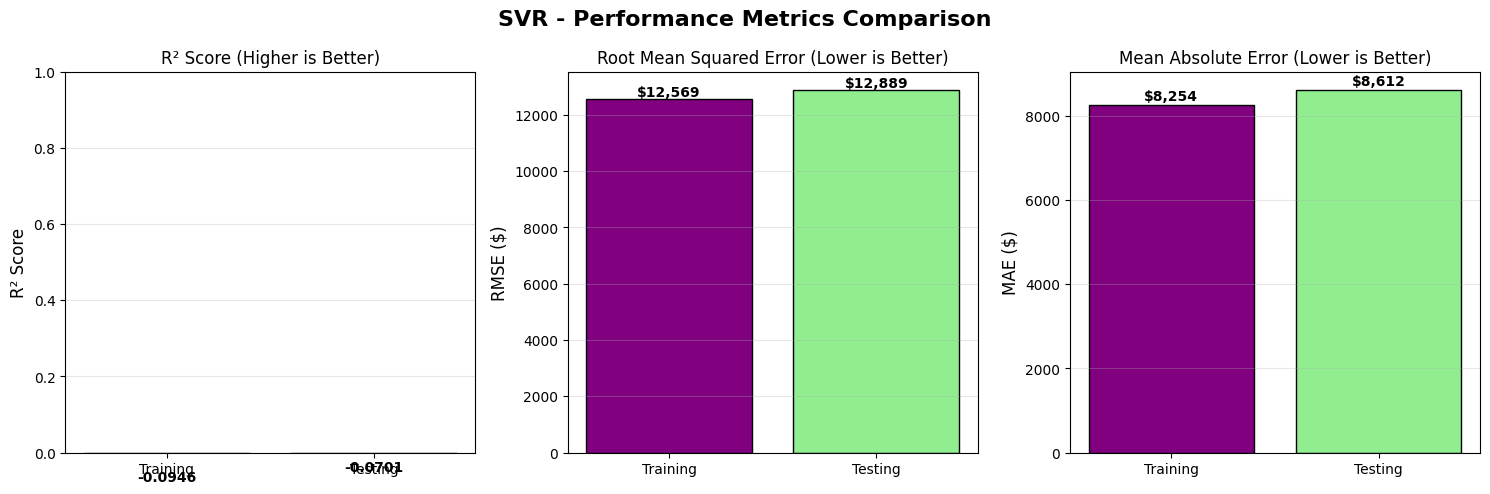

In [ ]:
# Training set metrics
r2_train_svr = r2_score(y_train, y_train_pred_svr)
mse_train_svr = mean_squared_error(y_train, y_train_pred_svr)
rmse_train_svr = np.sqrt(mse_train_svr)
mae_train_svr = mean_absolute_error(y_train, y_train_pred_svr)

# Testing set metrics
r2_test_svr = r2_score(y_test, y_test_pred_svr)
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)


# Display results
print("=" * 70)
print("SUPPORT VECTOR REGRESSION (SVR) MODEL - EVALUATION METRICS")
print("=" * 70)

print("\n" + "=" * 70)
print("TRAINING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_train_svr:.4f} ({r2_train_svr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_train_svr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_svr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_train_svr:,.2f}")

print("\n" + "=" * 70)
print("TESTING SET PERFORMANCE:")
print("=" * 70)
print(f"R² Score (R-squared):           {r2_test_svr:.4f} ({r2_test_svr * 100:.2f}%)")
print(f"Mean Squared Error (MSE):       ${mse_test_svr:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_svr:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_test_svr:,.2f}")

print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON (Train - Test):")
print("=" * 70)
print(f"R² Difference (Train - Test):   {r2_train_svr - r2_test_svr:.4f}")
print(f"RMSE Difference (Train - Test): ${rmse_train_svr - rmse_test_svr:,.2f}")
print(f"MAE Difference (Train - Test):  ${mae_train_svr - mae_test_svr:,.2f}")

# Visualize metrics comparison
metrics_comparison_svr = {
    "Metric": ["R² Score", "RMSE ($)", "MAE ($)"],
    "Training": [r2_train_svr, rmse_train_svr, mae_train_svr],
    "Testing": [r2_test_svr, rmse_test_svr, mae_test_svr],
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(
    "SVR - Performance Metrics Comparison", fontsize=16, fontweight="bold"
)

# R² Score
axes[0].bar(
    ["Training", "Testing"],
    [r2_train_svr, r2_test_svr],
    color=["purple", "lightgreen"],
    edgecolor="black",
)
axes[0].set_ylabel("R² Score", fontsize=12)
axes[0].set_title("R² Score (Higher is Better)", fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].grid(axis="y", alpha=0.3)
for i, v in enumerate([r2_train_svr, r2_test_svr]):
    axes[0].text(i, v + 0.02, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold")

# RMSE
axes[1].bar(
    ["Training", "Testing"],
    [rmse_train_svr, rmse_test_svr],
    color=["purple", "lightgreen"],
    edgecolor="black",
)
axes[1].set_ylabel("RMSE ($)", fontsize=12)
axes[1].set_title("Root Mean Squared Error (Lower is Better)", fontsize=12)
axes[1].grid(axis="y", alpha=0.3)
for i, v in enumerate([rmse_train_svr, rmse_test_svr]):
    axes[1].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")

# MAE
axes[2].bar(
    ["Training", "Testing"],
    [mae_train_svr, mae_test_svr],
    color=["purple", "lightgreen"],
    edgecolor="black",
)
axes[2].set_ylabel("MAE ($)", fontsize=12)
axes[2].set_title("Mean Absolute Error (Lower is Better)", fontsize=12)
axes[2].grid(axis="y", alpha=0.3)
for i, v in enumerate([mae_train_svr, mae_test_svr]):
    axes[2].text(i, v + 100, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold")


plt.tight_layout()
plt.show()

Comparing Multiple Linear Regression Models VS SVR Non Hyper Parameter

MODEL COMPARISON: LINEAR REGRESSION vs SUPPORT VECTOR REGRESSION

TESTING SET PERFORMANCE (Most Important):
  Metric Linear Regression            SVR      Difference     Winner
R² Score            0.7836        -0.0701         -0.8537 Linear Reg
MSE ($²)     33,596,915.85 166,128,803.81 +132,531,887.96 Linear Reg
RMSE ($)          5,796.28      12,889.10       +7,092.81 Linear Reg
 MAE ($)          4,181.19       8,612.41       +4,431.21 Linear Reg

TRAINING SET PERFORMANCE:
  Metric Linear Regression       SVR
R² Score            0.7417   -0.0946
RMSE ($)          6,105.55 12,569.10
 MAE ($)          4,208.23  8,253.92

PERCENTAGE IMPROVEMENT (SVR vs Linear Regression):
R² Score improvement:  -108.94%
RMSE reduction:        -122.37%
MAE reduction:         -105.98%


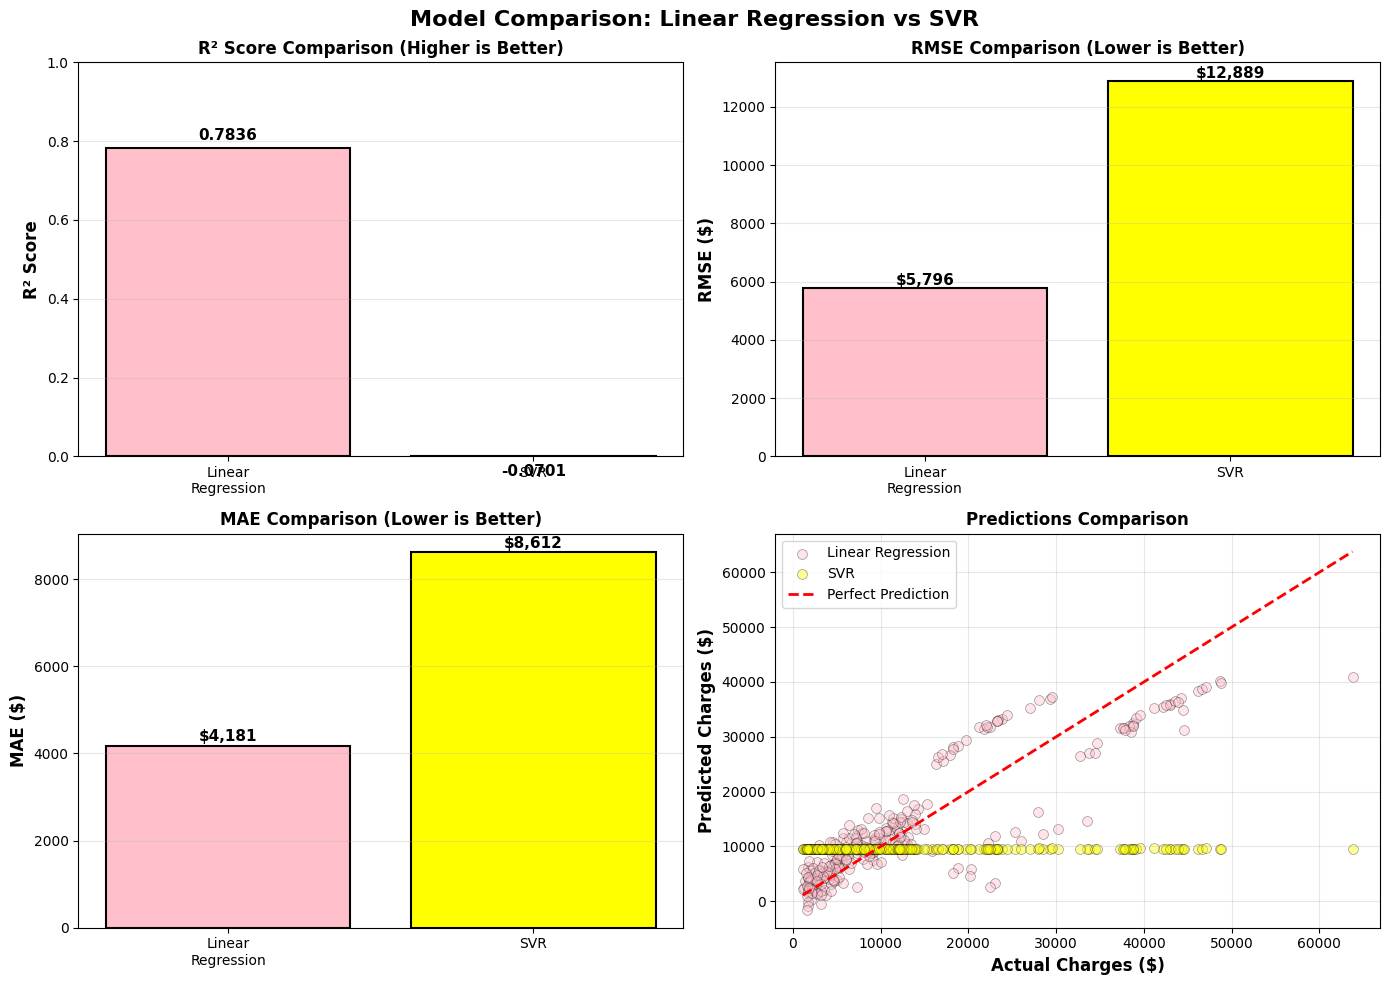

In [ ]:
# Create comprehensive comparison
print("="*80)
print("MODEL COMPARISON: LINEAR REGRESSION vs SUPPORT VECTOR REGRESSION")
print("="*80)

print("\n" + "="*80)
print("TESTING SET PERFORMANCE (Most Important):")
print("="*80)

comparison_data = {
    'Metric': ['R² Score', 'MSE ($²)', 'RMSE ($)', 'MAE ($)'],
    'Linear Regression': [
        f'{r2_test_lr:.4f}',
        f'{mse_test_lr:,.2f}',
        f'{rmse_test_lr:,.2f}',
        f'{mae_test_lr:,.2f}'
    ],
    'SVR': [
        f'{r2_test_svr:.4f}',
        f'{mse_test_svr:,.2f}',
        f'{rmse_test_svr:,.2f}',
        f'{mae_test_svr:,.2f}'
    ],
    'Difference': [
        f'{r2_test_svr - r2_test_lr:+.4f}',
        f'{mse_test_svr - mse_test_lr:+,.2f}',
        f'{rmse_test_svr - rmse_test_lr:+,.2f}',
        f'{mae_test_svr - mae_test_lr:+,.2f}'
    ],
    'Winner': [
        'SVR' if r2_test_svr > r2_test_lr else 'Linear Reg',
        'SVR' if mse_test_svr < mse_test_lr else 'Linear Reg',
        'SVR' if rmse_test_svr < rmse_test_lr else 'Linear Reg',
        'SVR' if mae_test_svr < mae_test_lr else 'Linear Reg'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*80)
print("TRAINING SET PERFORMANCE:")
print("="*80)

training_comparison_data = {
    'Metric': ['R² Score', 'RMSE ($)', 'MAE ($)'],
    'Linear Regression': [
        f'{r2_train_lr:.4f}',
        f'{rmse_train_lr:,.2f}',
        f'{mae_train_lr:,.2f}'
    ],
    'SVR': [
        f'{r2_train_svr:.4f}',
        f'{rmse_train_svr:,.2f}',
        f'{mae_train_svr:,.2f}'
    ]
}

training_comparison_df = pd.DataFrame(training_comparison_data)
print(training_comparison_df.to_string(index=False))

# Calculate performance improvement
r2_improvement = ((r2_test_svr - r2_test_lr) / r2_test_lr) * 100
rmse_improvement = ((rmse_test_lr - rmse_test_svr) / rmse_test_lr) * 100
mae_improvement = ((mae_test_lr - mae_test_svr) / mae_test_lr) * 100

print("\n" + "="*80)
print("PERCENTAGE IMPROVEMENT (SVR vs Linear Regression):")
print("="*80)
print(f"R² Score improvement:  {r2_improvement:+.2f}%")
print(f"RMSE reduction:        {rmse_improvement:+.2f}%")
print(f"MAE reduction:         {mae_improvement:+.2f}%")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Comparison: Linear Regression vs SVR', fontsize=16, fontweight='bold')

# R² Comparison
models = ['Linear\nRegression', 'SVR']
r2_scores = [r2_test_lr, r2_test_svr]
colors_r2 = ["pink", "yellow"]
axes[0, 0].bar(models, r2_scores, color=colors_r2, edgecolor="black", linewidth=1.5)
axes[0, 0].set_ylabel("R² Score", fontsize=12, fontweight="bold")
axes[0, 0].set_title(
    "R² Score Comparison (Higher is Better)", fontsize=12, fontweight="bold"
)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(r2_scores):
    axes[0, 0].text(
        i, v + 0.02, f"{v:.4f}", ha="center", fontsize=11, fontweight="bold"
    )
# RMSE Comparison
rmse_scores = [rmse_test_lr, rmse_test_svr]
axes[0, 1].bar(models, rmse_scores, color=colors_r2, edgecolor="black", linewidth=1.5)
axes[0, 1].set_ylabel("RMSE ($)", fontsize=12, fontweight="bold")
axes[0, 1].set_title(
    "RMSE Comparison (Lower is Better)", fontsize=12, fontweight="bold"
)
axes[0, 1].grid(axis="y", alpha=0.3)
for i, v in enumerate(rmse_scores):
    axes[0, 1].text(
        i, v + 100, f"${v:,.0f}", ha="center", fontsize=11, fontweight="bold"
    )

# MAE Comparison
mae_scores = [mae_test_lr, mae_test_svr]
axes[1, 0].bar(models, mae_scores, color=colors_r2, edgecolor="black", linewidth=1.5)
axes[1, 0].set_ylabel("MAE ($)", fontsize=12, fontweight="bold")
axes[1, 0].set_title("MAE Comparison (Lower is Better)", fontsize=12, fontweight="bold")
axes[1, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(mae_scores):
    axes[1, 0].text(
        i, v + 100, f"${v:,.0f}", ha="center", fontsize=11, fontweight="bold"
    )

# Side-by-side predictions scatter
axes[1, 1].scatter(
    y_test,
    y_test_pred_lr,
    alpha=0.4,
    label="Linear Regression",
    color="pink",
    edgecolors="black",
    linewidth=0.5,
    s=50,
)
axes[1, 1].scatter(
    y_test,
    y_test_pred_svr,
    alpha=0.4,
    label="SVR",
    color="yellow",
    edgecolors="black",
    linewidth=0.5,
    s=50,
)
axes[1, 1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[1, 1].set_xlabel("Actual Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_ylabel("Predicted Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_title("Predictions Comparison", fontsize=12, fontweight="bold")
axes[1, 1].legend(loc="upper left")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Determine overall winner
print("\n" + "=" * 80)
print("OVERALL MODEL RECOMMENDATION:")
print("=" * 80)

if r2_test_svr > r2_test_lr and rmse_test_svr < rmse_test_lr:
    print("WINNER: Support Vector Regression (SVR)")
    print("Reason: SVR shows better performance on both R² and RMSE metrics.")
elif r2_test_lr > r2_test_svr and rmse_test_lr < rmse_test_svr:
    print("WINNER: Linear Regression")
    print("Reason: Linear Regression shows better performance and is simpler.")
else:
    print("RESULT: Mixed Performance")
    print("Reason: Each model has advantages in different metrics.")
    print("Consider using both models and ensemble their predictions.")


OVERALL MODEL RECOMMENDATION:
WINNER: Linear Regression
Reason: Linear Regression shows better performance and is simpler.


SVR Models (Hyperparameter Tuning)

In [ ]:
# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print("=" * 70)
print("SVR HYPERPARAMETER TUNING - GRID SEARCH")
print("=" * 70)
print("\nSearching for optimal hyperparameters...")
print("This may take several minutes depending on your system.\n")

# Define parameter grid to search
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1],
    "epsilon": [0.01, 0.1, 0.2, 0.5],
}

print("Parameter grid to explore:")
print(f"  - C (Regularization): {param_grid['C']}")
print(f"  - Gamma: {param_grid['gamma']}")
print(f"  - Epsilon: {param_grid['epsilon']}")
print(
    f"\nTotal combinations to test: {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['epsilon'])}"
)

# Initialize SVR for grid search
svr_grid = SVR(kernel="rbf")

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=svr_grid,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Optimize for R² score
    n_jobs=-1,  # Use all available cores
    verbose=1,
)

# Fit grid search
print("\n" + "=" * 70)
print("Starting Grid Search...")
print("=" * 70)
grid_search.fit(X_train_scaled, y_train)

print("\n" + "=" * 70)
print("GRID SEARCH RESULTS:")
print("=" * 70)
print(f"Best R² Score (Cross-Validation): {grid_search.best_score_:.4f}")
print(f"\nBest Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"  - {param}: {value}")

# Get the best model
best_svr_model = grid_search.best_estimator_

SVR HYPERPARAMETER TUNING - GRID SEARCH

Searching for optimal hyperparameters...
This may take several minutes depending on your system.

Parameter grid to explore:
  - C (Regularization): [0.1, 1, 10, 100]
  - Gamma: ['scale', 'auto', 0.001, 0.01, 0.1]
  - Epsilon: [0.01, 0.1, 0.2, 0.5]

Total combinations to test: 80

Starting Grid Search...
Fitting 5 folds for each of 80 candidates, totalling 400 fits

GRID SEARCH RESULTS:
Best R² Score (Cross-Validation): 0.1716

Best Parameters Found:
  - C: 100
  - epsilon: 0.5
  - gamma: 0.1


In [ ]:
print("\n" + "=" * 70)
print("Top 5 Parameter Combinations:")
print("=" * 70)

# Display top 5 results
results_df = pd.DataFrame(grid_search.cv_results_)
top_5 = results_df.nlargest(5, "mean_test_score")[
    ["params", "mean_test_score", "std_test_score"]
]
for idx, row in top_5.iterrows():
    print(f"\nRank {top_5.index.get_loc(idx) + 1}:")
    print(f"  Parameters: {row['params']}")
    print(
        f"  Mean CV R² Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})"
    )


Top 5 Parameter Combinations:

Rank 1:
  Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 2:
  Parameters: {'C': 100, 'epsilon': 0.2, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 3:
  Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 4:
  Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.1}
  Mean CV R² Score: 0.1716 (±0.0432)

Rank 5:
  Parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto'}
  Mean CV R² Score: 0.1509 (±0.0429)


Evaluate Tuned SVR Models

In [ ]:
y_train_pred_tuned = best_svr_model.predict(X_train_scaled)
y_test_pred_tuned = best_svr_model.predict(X_test_scaled)

# Calculate evaluation metrics for Tuned SVR
r2_train_tuned = r2_score(y_train, y_train_pred_tuned)
mse_train_tuned = mean_squared_error(y_train, y_train_pred_tuned)
rmse_train_tuned = np.sqrt(mse_train_tuned)
mae_train_tuned = mean_absolute_error(y_train, y_train_pred_tuned)

r2_test_tuned = r2_score(y_test, y_test_pred_tuned)
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
rmse_test_tuned = np.sqrt(mse_test_tuned)
mae_test_tuned = mean_absolute_error(y_test, y_test_pred_tuned)

# Display results
print("\n" + "=" * 70)
print("TUNED SVR MODEL - EVALUATION METRICS")
print("=" * 70)

print("\n" + "=" * 70)
print("TRAINING SET PERFORMANCE:")
print("=" * 70)
print(
    f"R² Score (R-squared):           {r2_train_tuned:.4f} ({r2_train_tuned * 100:.2f}%)"
)
print(f"Mean Squared Error (MSE):       ${mse_train_tuned:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train_tuned:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_train_tuned:,.2f}")

print("\n" + "=" * 70)
print("TESTING SET PERFORMANCE:")
print("=" * 70)
print(
    f"R² Score (R-squared):           {r2_test_tuned:.4f} ({r2_test_tuned * 100:.2f}%)"
)
print(f"Mean Squared Error (MSE):       ${mse_test_tuned:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test_tuned:,.2f}")
print(f"Mean Absolute Error (MAE):      ${mae_test_tuned:,.2f}")

# Compare with previous models
print("\n" + "=" * 70)
print("IMPROVEMENT FROM HYPERPARAMETER TUNING:")
print("=" * 70)
print(
    f"R² improvement over basic SVR:     {(r2_test_tuned - r2_test_svr):.4f} ({((r2_test_tuned - r2_test_svr) / r2_test_svr) * 100:+.2f}%)"
)
print(
    f"RMSE reduction from basic SVR:     ${(rmse_test_svr - rmse_test_tuned):,.2f} ({((rmse_test_svr - rmse_test_tuned) / rmse_test_svr) * 100:+.2f}%)"
)
print(
    f"MAE reduction from basic SVR:      ${(mae_test_svr - mae_test_tuned):,.2f} ({((mae_test_svr - mae_test_tuned) / mae_test_svr) * 100:+.2f}%)"
)

print("\n" + "=" * 70)
print(
    f"R² improvement over Linear Reg:    {(r2_test_tuned - r2_test_lr):.4f} ({((r2_test_tuned - r2_test_lr) / r2_test_lr) * 100:+.2f}%)"
)
print(
    f"RMSE reduction from Linear Reg:    ${(rmse_test_lr - rmse_test_tuned):,.2f} ({((rmse_test_lr - rmse_test_tuned) / rmse_test_lr) * 100:+.2f}%)"
)
print(
    f"MAE reduction from Linear Reg:     ${(mae_test_lr - mae_test_tuned):,.2f} ({((mae_test_lr - mae_test_tuned) / mae_test_lr) * 100:+.2f}%)"
)


TUNED SVR MODEL - EVALUATION METRICS

TRAINING SET PERFORMANCE:
R² Score (R-squared):           0.2344 (23.44%)
Mean Squared Error (MSE):       $110,501,796.84
Root Mean Squared Error (RMSE): $10,511.98
Mean Absolute Error (MAE):      $5,602.83

TESTING SET PERFORMANCE:
R² Score (R-squared):           0.2697 (26.97%)
Mean Squared Error (MSE):       $113,376,007.82
Root Mean Squared Error (RMSE): $10,647.82
Mean Absolute Error (MAE):      $5,695.15

IMPROVEMENT FROM HYPERPARAMETER TUNING:
R² improvement over basic SVR:     0.3398 (-484.86%)
RMSE reduction from basic SVR:     $2,241.28 (+17.39%)
MAE reduction from basic SVR:      $2,917.26 (+33.87%)

R² improvement over Linear Reg:    -0.5139 (-65.58%)
RMSE reduction from Linear Reg:    $-4,851.53 (-83.70%)
MAE reduction from Linear Reg:     $-1,513.96 (-36.21%)


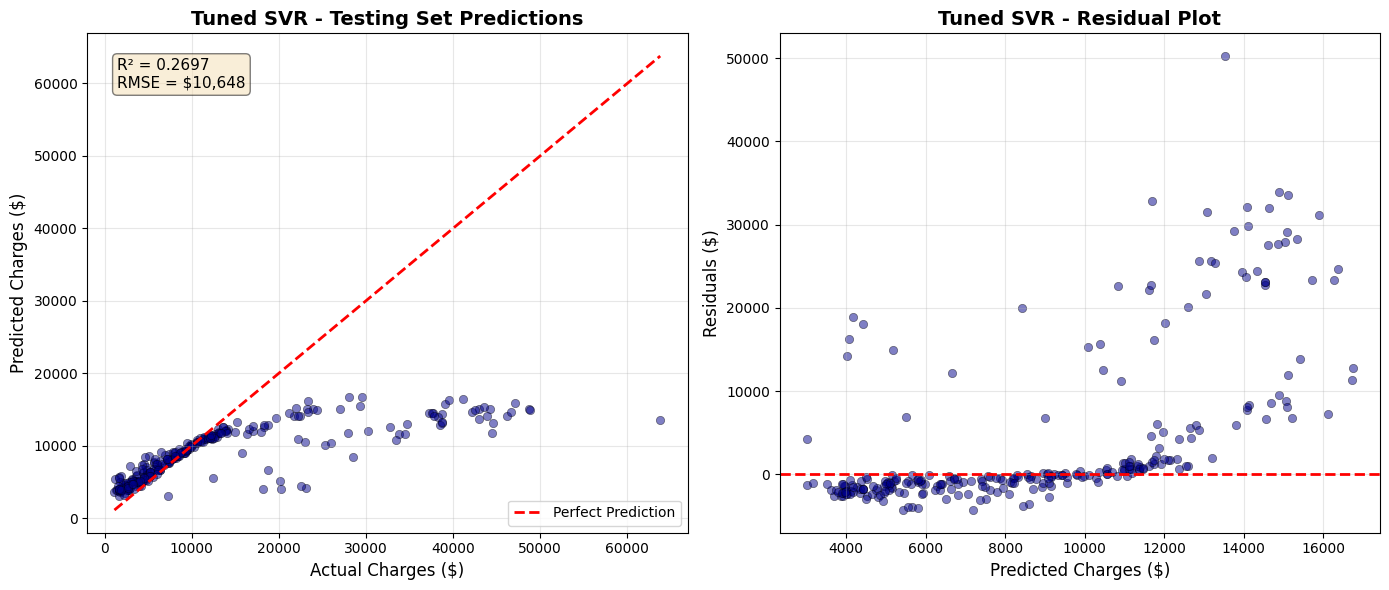


MODEL COMPLEXITY COMPARISON:
Basic SVR - Support Vectors:  1070
Tuned SVR - Support Vectors:  1070
Difference:                   +0


In [ ]:
# Visualize tuned SVR predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Predictions scatter plot
axes[0].scatter(
    y_test,
    y_test_pred_tuned,
    alpha=0.5,
    color="darkblue",
    edgecolors="black",
    linewidth=0.5,
)
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[0].set_xlabel("Actual Charges ($)", fontsize=12)
axes[0].set_ylabel("Predicted Charges ($)", fontsize=12)
axes[0].set_title("Tuned SVR - Testing Set Predictions", fontsize=14, fontweight="bold")
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(
    0.05,
    0.95,
    f"R² = {r2_test_tuned:.4f}\nRMSE = ${rmse_test_tuned:,.0f}",
    transform=axes[0].transAxes,
    fontsize=11,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
)

# Residuals plot
residuals_tuned = y_test - y_test_pred_tuned
axes[1].scatter(
    y_test_pred_tuned,
    residuals_tuned,
    alpha=0.5,
    color="darkblue",
    edgecolors="black",
    linewidth=0.5,
)
axes[1].axhline(y=0, color="r", linestyle="--", lw=2)
axes[1].set_xlabel("Predicted Charges ($)", fontsize=12)
axes[1].set_ylabel("Residuals ($)", fontsize=12)
axes[1].set_title("Tuned SVR - Residual Plot", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Number of support vectors comparison
print("\n" + "=" * 70)
print("MODEL COMPLEXITY COMPARISON:")
print("=" * 70)
print(f"Basic SVR - Support Vectors:  {len(svr_model.support_)}")
print(f"Tuned SVR - Support Vectors:  {len(best_svr_model.support_)}")
print(
    f"Difference:                   {len(best_svr_model.support_) - len(svr_model.support_):+d}"
)

FINAL MODEL COMPARISON: ALL THREE MODELS

       Metric Linear Regression  Basic SVR          Tuned SVR
     R² Score            0.7836    -0.0701             0.2697
     RMSE ($)         $5,796.28 $12,889.10         $10,647.82
      MAE ($)         $4,181.19  $8,612.41          $5,695.15
Training Time         Very Fast   Moderate Slow (Grid Search)
   Complexity               Low     Medium               High


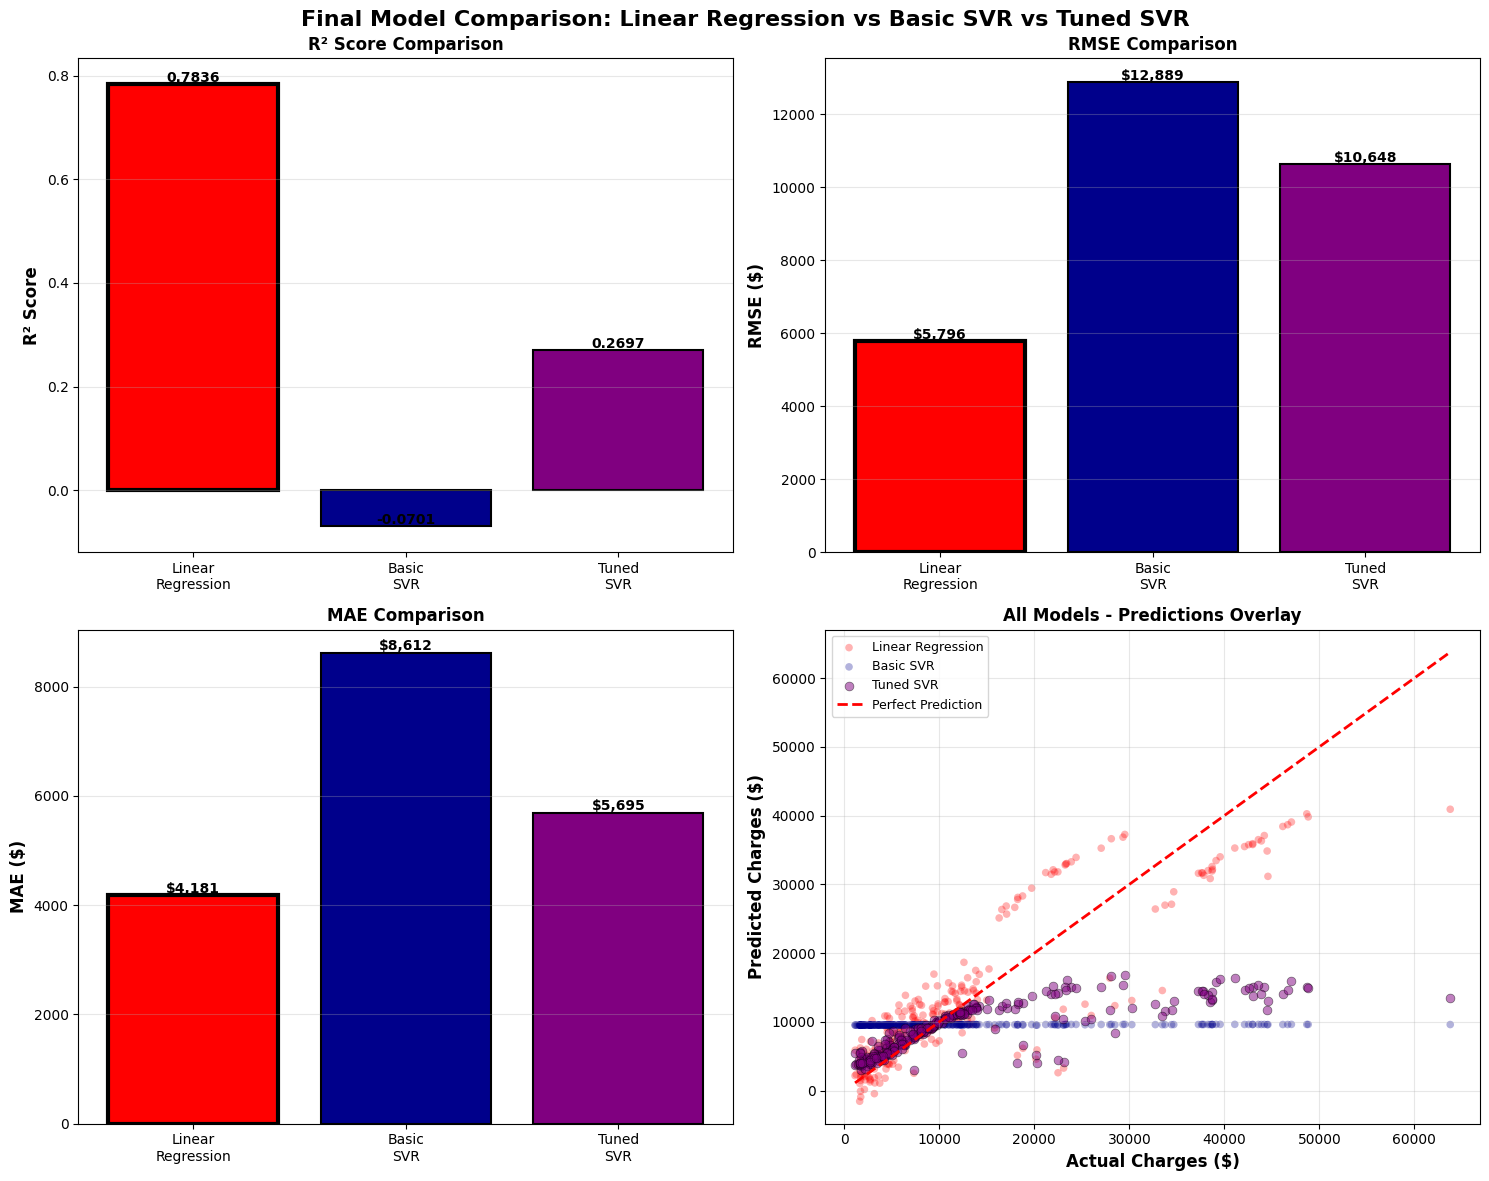

In [ ]:
# Create final comprehensive comparison
print("=" * 90)
print("FINAL MODEL COMPARISON: ALL THREE MODELS")
print("=" * 90)

# Create comparison DataFrame
final_comparison = {
    "Metric": ["R² Score", "RMSE ($)", "MAE ($)", "Training Time", "Complexity"],
    "Linear Regression": [
        f"{r2_test_lr:.4f}",
        f"${rmse_test_lr:,.2f}",
        f"${mae_test_lr:,.2f}",
        "Very Fast",
        "Low",
    ],
    "Basic SVR": [
        f"{r2_test_svr:.4f}",
        f"${rmse_test_svr:,.2f}",
        f"${mae_test_svr:,.2f}",
        "Moderate",
        "Medium",
    ],
    "Tuned SVR": [
        f"{r2_test_tuned:.4f}",
        f"${rmse_test_tuned:,.2f}",
        f"${mae_test_tuned:,.2f}",
        "Slow (Grid Search)",
        "High",
    ],
}
final_df = pd.DataFrame(final_comparison)
print("\n" + final_df.to_string(index=False))

# Visualize final comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(
    "Final Model Comparison: Linear Regression vs Basic SVR vs Tuned SVR",
    fontsize=16,
    fontweight="bold",
)

models = ["Linear\nRegression", "Basic\nSVR", "Tuned\nSVR"]
colors = ["red", "darkblue", "purple"]

# R² Comparison
r2_values = [r2_test_lr, r2_test_svr, r2_test_tuned]
bars1 = axes[0, 0].bar(
    models, r2_values, color=colors, edgecolor="black", linewidth=1.5
)
axes[0, 0].set_ylabel("R² Score", fontsize=12, fontweight="bold")
axes[0, 0].set_title("R² Score Comparison", fontsize=12, fontweight="bold")
axes[0, 0].set_ylim([min(r2_values) - 0.05, max(r2_values) + 0.05])
axes[0, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(r2_values):
    axes[0, 0].text(
        i, v + 0.005, f"{v:.4f}", ha="center", fontsize=10, fontweight="bold"
    )
# Highlight best
best_r2_idx = np.argmax(r2_values)
bars1[best_r2_idx].set_edgecolor("black")
bars1[best_r2_idx].set_linewidth(3)

# RMSE Comparison
rmse_values = [rmse_test_lr, rmse_test_svr, rmse_test_tuned]
bars2 = axes[0, 1].bar(
    models, rmse_values, color=colors, edgecolor="black", linewidth=1.5
)
axes[0, 1].set_ylabel("RMSE ($)", fontsize=12, fontweight="bold")
axes[0, 1].set_title("RMSE Comparison", fontsize=12, fontweight="bold")
axes[0, 1].grid(axis="y", alpha=0.3)
for i, v in enumerate(rmse_values):
    axes[0, 1].text(
        i, v + 50, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold"
    )
# Highlight best
best_rmse_idx = np.argmin(rmse_values)
bars2[best_rmse_idx].set_edgecolor("black")
bars2[best_rmse_idx].set_linewidth(3)

# MAE Comparison
mae_values = [mae_test_lr, mae_test_svr, mae_test_tuned]
bars3 = axes[1, 0].bar(
    models, mae_values, color=colors, edgecolor="black", linewidth=1.5
)
axes[1, 0].set_ylabel("MAE ($)", fontsize=12, fontweight="bold")
axes[1, 0].set_title("MAE Comparison", fontsize=12, fontweight="bold")
axes[1, 0].grid(axis="y", alpha=0.3)
for i, v in enumerate(mae_values):
    axes[1, 0].text(
        i, v + 50, f"${v:,.0f}", ha="center", fontsize=10, fontweight="bold"
    )
# Highlight best
best_mae_idx = np.argmin(mae_values)
bars3[best_mae_idx].set_edgecolor("black")
bars3[best_mae_idx].set_linewidth(3)

# All predictions on one plot
axes[1, 1].scatter(
    y_test,
    y_test_pred_lr,
    alpha=0.3,
    label="Linear Regression",
    color="red",
    edgecolors="none",
    s=30,
)
axes[1, 1].scatter(
    y_test,
    y_test_pred_svr,
    alpha=0.3,
    label="Basic SVR",
    color="darkblue",
    edgecolors="none",
    s=30,
)
axes[1, 1].scatter(
    y_test,
    y_test_pred_tuned,
    alpha=0.5,
    label="Tuned SVR",
    color="purple",
    edgecolors="black",
    linewidth=0.5,
    s=40,
)
axes[1, 1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
axes[1, 1].set_xlabel("Actual Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_ylabel("Predicted Charges ($)", fontsize=12, fontweight="bold")
axes[1, 1].set_title("All Models - Predictions Overlay", fontsize=12, fontweight="bold")
axes[1, 1].legend(loc="upper left", fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()